In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def load_and_prepare_data(csv_path):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=['label'])
    y = df['label']

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

    return X_train, X_test, y_train, y_test, label_encoder


In [22]:
from sklearn.linear_model import LogisticRegression

def train_logistic_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    return model, acc, "logistic_regression_cr.joblib"


In [23]:
from sklearn.tree import DecisionTreeClassifier

def train_decision_tree(X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    return model, acc, "decision_tree_cr.joblib"


In [24]:
from sklearn.ensemble import RandomForestClassifier

def train_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    return model, acc, "random_forest_cr.joblib"


In [25]:
from xgboost import XGBClassifier

def train_xgboost(X_train, X_test, y_train, y_test):
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    return model, acc, "xgboost_cr.joblib"


In [ ]:
def compare_and_save_best_model(csv_path):
    X_train, X_test, y_train, y_test, label_encoder = load_and_prepare_data(csv_path)
    n_classes = len(label_encoder.classes_)

    model_results = []
    model_results.append(train_logistic_regression(X_train, X_test, y_train, y_test))
    model_results.append(train_decision_tree(X_train, X_test, y_train, y_test))
    model_results.append(train_random_forest(X_train, X_test, y_train, y_test))
    model_results.append(train_xgboost(X_train, X_test, y_train, y_test))

    model_names = [name.replace("_cr.joblib", "").replace("_", " ").title() for _, _, name in model_results]
    accuracies = [acc for _, acc, _ in model_results]

    best_model, best_acc, best_name = max(model_results, key=lambda x: x[1])

    joblib.dump(best_model,"D:/WebProject/v3Project/Farming Solution/backend/models/random_forest_cr.joblib")
    joblib.dump(label_encoder, "D:/WebProject/v3Project/Farming Solution/backend/models/label_encoder_cr.joblib")

    print(f"\nBest model: {best_name} with accuracy {best_acc:.4f}")

    # Plot horizontal bar chart
    plt.figure(figsize=(10, 5))
    bars = plt.barh(model_names, accuracies, color='mediumseagreen')
    plt.xlabel("Accuracy")
    plt.ylabel("Model")
    plt.title("Model Accuracy Comparison")
    plt.xlim(0, 1)

    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f"{acc:.2f}",
                 va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    return best_name, best_acc


c:\Users\SRIRAM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\SRIRAM\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:46:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Best model: random_forest_cr.joblib with accuracy 0.9955


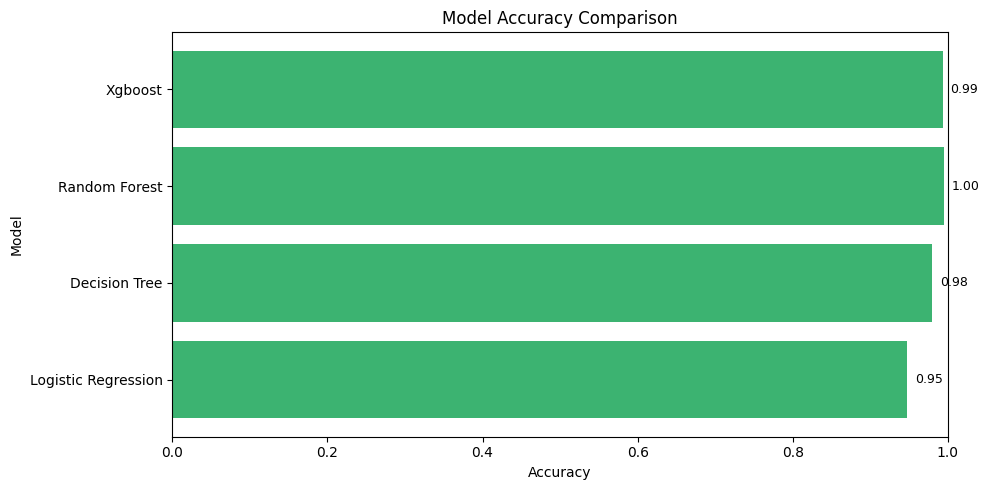

('random_forest_cr.joblib', 0.9954545454545455)

In [27]:
compare_and_save_best_model("D:/WebProject/v3Project/Farming Solution/Crop_recommendation.csv")